# SNSim Examples

In [1]:
import snsim
import numpy as np

## Simulate one SNIa by setting the parameters

### Init survey file

In [2]:
# Set the cosmology
cosmology = {'name': 'planck18'}
cosmo =  snsim.utils.set_cosmo(cosmology)

# Set the sncosmo model
sn_model = snsim.utils.init_sn_model('salt2')

# Set the survey
survey_config = {'survey_file': './survey_file_example.csv',
                 'sig_psf': 0.0,
                 'sig_zp': 0.0,
                 'gain': 1.,
                 'zp': 26.,
                 'ra_size': 7.295,
                 'dec_size': 7.465,
                 'noise_key': ['skynoise', 'skysigADU']}
survey = snsim.survey_host.SurveyObs(survey_config)
print(survey)

SURVEY FILE : ./survey_file_example.csv

First day in survey_file : 58000.00 MJD / 2017-09-04 00:00:00.000
Last day in survey_file : 58100.00 MJD / 2017-12-13 00:00:00.000

Survey effective duration is 100.00 days

Survey effective area is 54.48squared degrees (0.1 % of the sky)

No cut on survey file.


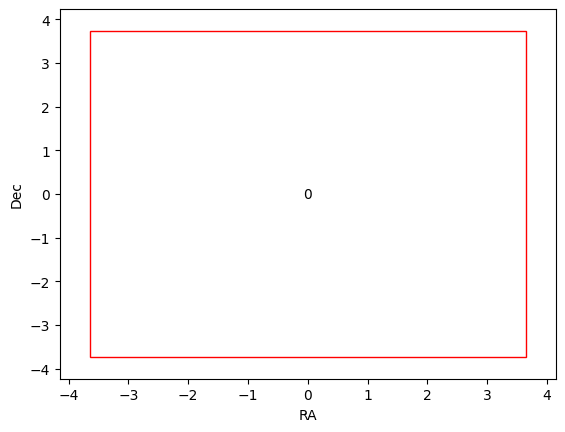

In [3]:
# Show the field map (Here one quadrant labeled 0)
survey.fields.show_map()

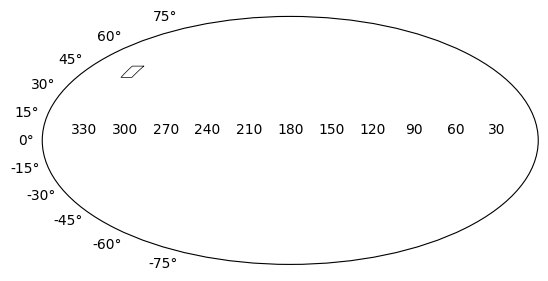

In [4]:
# Show fields on ra dec map
survey.fields.show_fields()

### Init SN 

In [5]:
# Set the SN parameters
zcos = 0.05
coords = np.radians([42, 42])
sn_par = {'zcos': zcos,
          'z2cmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          'sim_t0': 58030,
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.0,
          'sncosmo': {'x1': 1, 'c': 0.1}
           }
model_par = {'M0': -19.3,
             'alpha': 0.14,
             'beta': 3.1,
             'mod_fcov': False}

SNIa = snsim.astrobj.SNIa(sn_par, sn_model, model_par=model_par)

In [6]:
epochs,_ = survey.epochs_selection(SNIa.coord[0],
                                   SNIa.coord[1],
                                   SNIa.sim_t0,
                                   SNIa.zobs,
                                   SNIa.sim_model.mintime(),
                                   SNIa.sim_model.maxtime())

SNIa.epochs = epochs

SNIa.gen_flux(np.random.default_rng(1200))

### Plot the SN

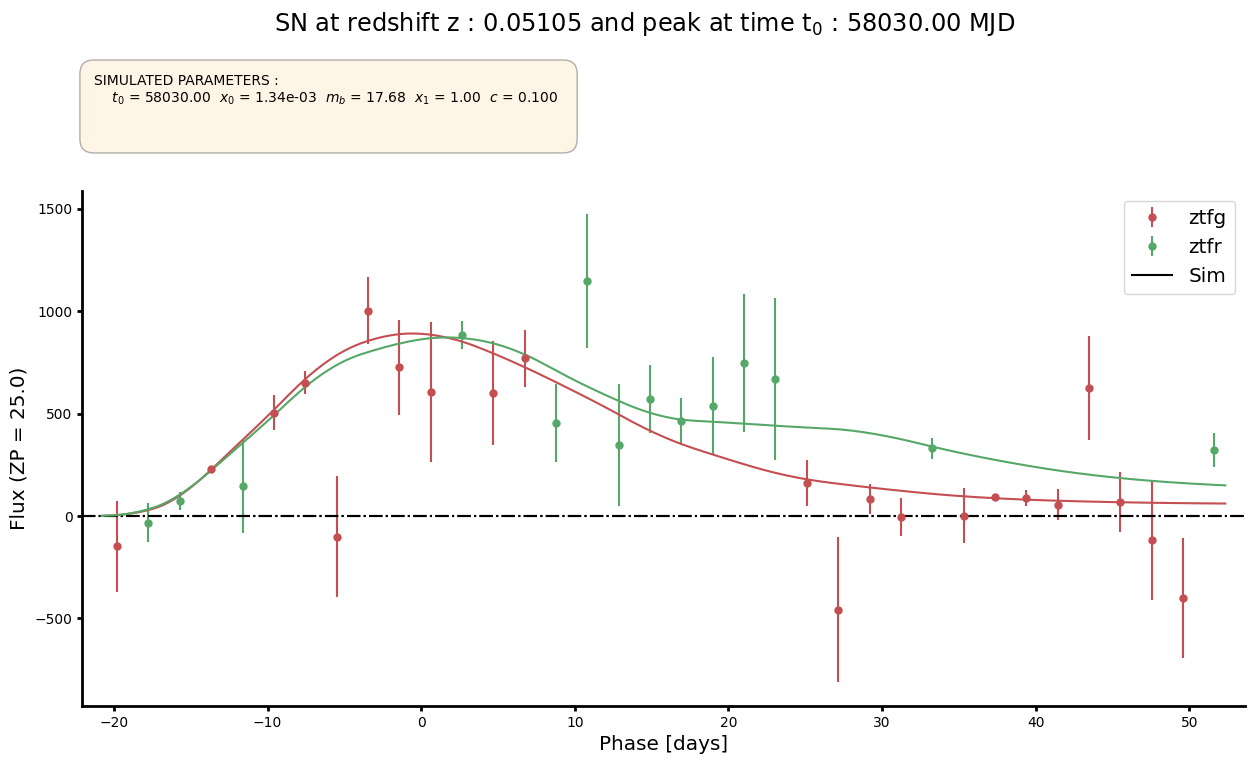

In [7]:
bandcol = {'ztfg': 'C2', 'ztfr': 'C1', 'ztfi': 'C5'}
snsim.plot_utils.plot_lc(SNIa.sim_lc,SNIa.sim_lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol)